In [1]:
#svm clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [7]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [8]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
print("the accuracy score is:",accuracy_score(y_pred,y_test))

the accuracy score is: 0.9


In [15]:
from sklearn.metrics import classification_report
print("Classfication Report:")
print(classification_report(y_test,y_pred))

Classfication Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



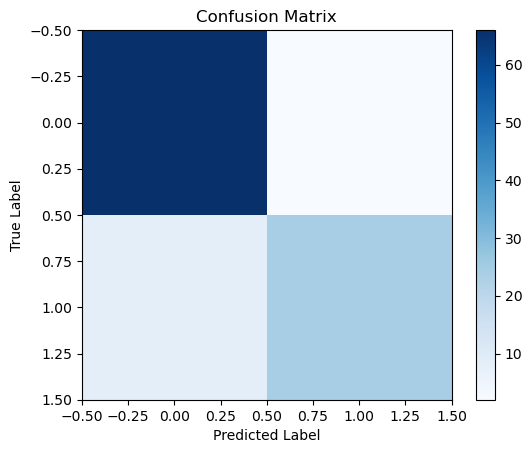

In [19]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
#Logstic regression 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
df=pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [22]:
x=df.iloc[:,[0]].values
y=df.iloc[:,1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)
x_test

array([[54],
       [60],
       [47],
       [29],
       [61],
       [58],
       [52]], dtype=int64)

In [25]:
y_test

array([1, 1, 1, 0, 1, 1, 0], dtype=int64)

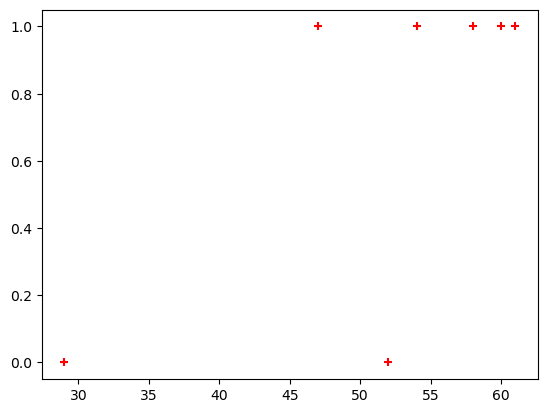

In [26]:
plt.scatter(x_test,y_test,marker='+',color='red')

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

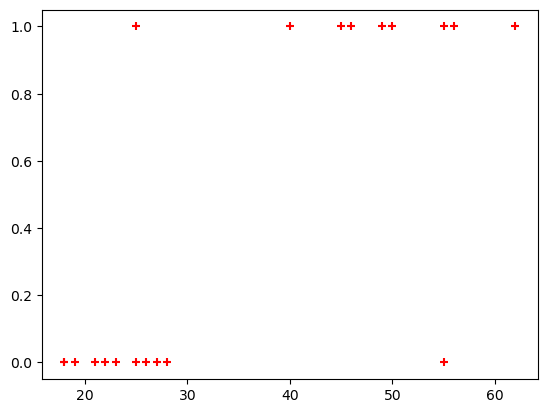

In [29]:
plt.scatter(x_train,y_train,marker='+',color='red')

In [31]:
y_predicted=model.predict(x_test)
y_predicted

array([1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [32]:
model.predict_proba(x_test)

array([[0.07917734, 0.92082266],
       [0.03480824, 0.96519176],
       [0.19156608, 0.80843392],
       [0.7625697 , 0.2374303 ],
       [0.03025744, 0.96974256],
       [0.04596409, 0.95403591],
       [0.10303523, 0.89696477]])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



In [35]:
#Hierarchical clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv("MAll_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
x=dataset.iloc[:,[3,4]].values

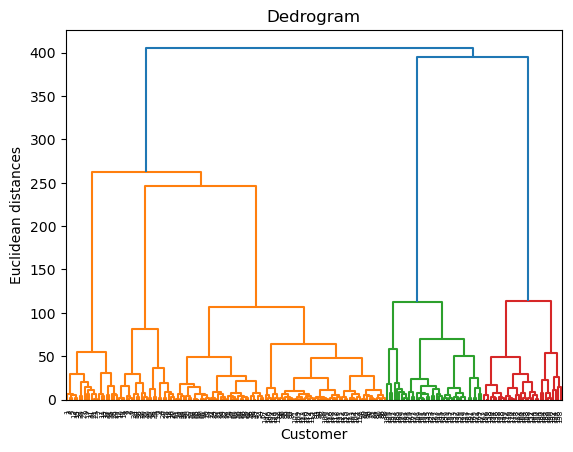

In [38]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dedrogram")
plt.xlabel("Customer")
plt.ylabel('Euclidean distances')
plt.show()

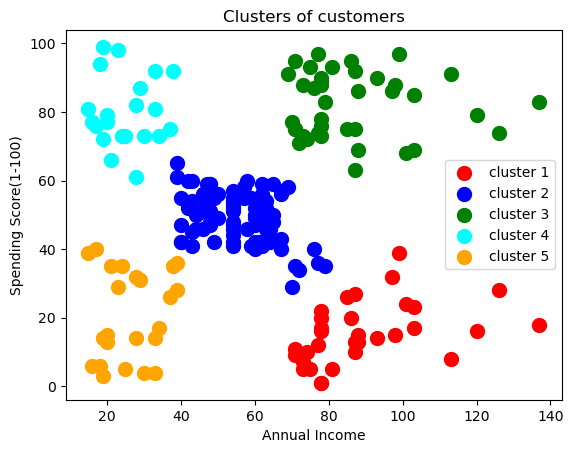

In [41]:
from sklearn.cluster import AgglomerativeClustering 
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='orange',label='cluster 5')
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()